## Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random
import numpy as np
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from pathlib import Path
import scipy.io
import py_pcha

import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [2]:
path = Path().cwd()

data_path = path.parent / "Week_11" / "Data" / "IMAGES.mat"
mat = scipy.io.loadmat(data_path)

images = mat['IMAGES']

patch_size=[16, 16]
Ncol=int(images.shape[1]/patch_size[1])
Nrow=int(images.shape[0]/patch_size[0])
Nim=images.shape[2]

#Patch images with no overlap between patches
X=np.zeros((int(patch_size[0]*patch_size[1]),int(Nim*Nrow*Ncol)))
for im in range(Nim):
    for i in range(1,Nrow+1):
        for j in range(1,Ncol+1):
            patch=images[(i-1)*patch_size[0]:i*patch_size[0],(j-1)*patch_size[1]:j*patch_size[1],im]
            X[:,im*Nrow*Ncol+(i-1)*Ncol+j-1]=np.reshape(patch[:],(-1),order='F')
            


In [3]:
n_rows = 7 #for plotting
n_cols = 7 #for plotting
left = 0.0
right = 0.0
bottom = 0.99
top = 0.83
wspace = 0.0
hspace = 0.0
image_shape = (16, 16)
def plot_components(title, components, fig, outer):
    
    # set outer titles
    ax = plt.Subplot(fig, outer)
    ax.set_title(title)
    ax.axis('off')
    fig.add_subplot(ax)
    
    inner = gridspec.GridSpecFromSubplotSpec(n_rows, n_cols,subplot_spec=outer, wspace=0.1, hspace=0.1)
    
    for i, comp in enumerate(components):
        ax = plt.Subplot(fig, inner[i])
        # normalize colormap
        vmax = max(comp.max(), -comp.min())
        ax.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)

n_components=49
lambda_=0.5
Npatches=2500

> Compare the features to the features
generated by SVD. How do the features differ?

## Make decomposition

In [4]:
model = decomposition.DictionaryLearning(n_components=n_components, alpha=lambda_, transform_alpha=lambda_, max_iter=1000, transform_max_iter=1000, fit_algorithm='cd', transform_algorithm='lasso_cd')
H_SC = model.fit_transform(X[:,0:Npatches].T).T
W_SC = model.components_

model = decomposition.PCA(n_components=n_components)
H_PCA = model.fit_transform(X[:,0:Npatches].T).T
W_PCA = model.components_

Text(0.5, 1.0, 'Histrogram of the values in H for SVD, lambda=0.5')

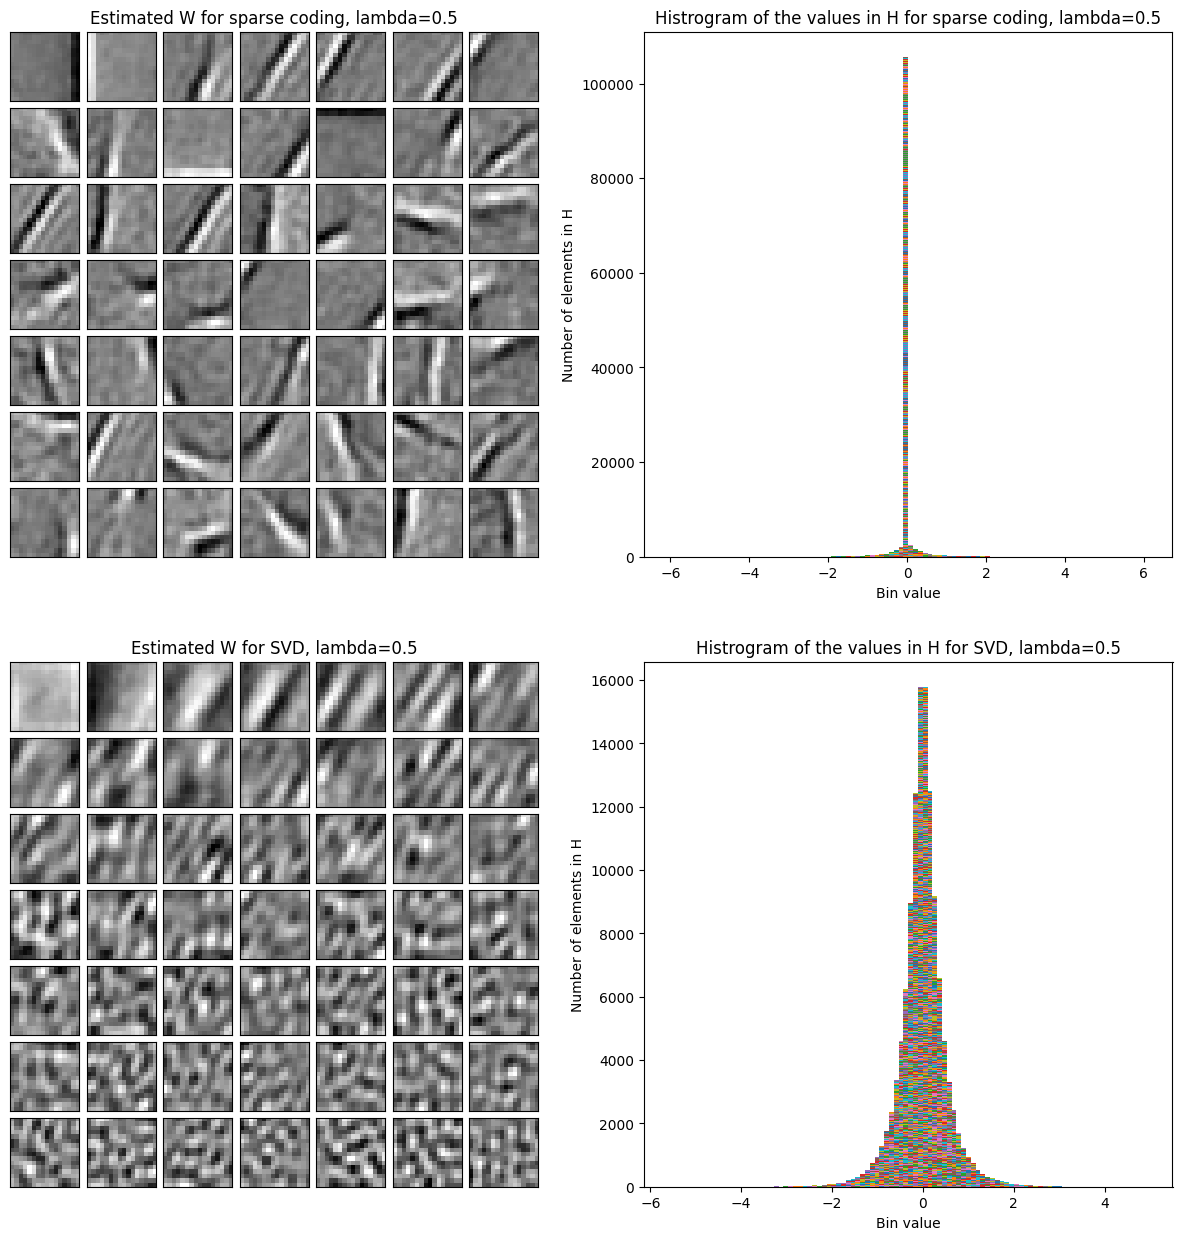

In [5]:
fig = plt.figure(figsize=(15, 15))
outer = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.2)

# Plot SC W
plot_components(f'Estimated W for sparse coding, lambda={lambda_}', W_SC, fig, outer[0])

# Plot SC H
ax2 = fig.add_subplot(outer[1])
ax2.hist((H_SC[:]),bins=100, stacked=True)
ax2.set_ylabel('Number of elements in H')
ax2.set_xlabel('Bin value');
ax2.set_title(f'Histrogram of the values in H for sparse coding, lambda={lambda_}') 

# Plot PCA W
plot_components(f'Estimated W for SVD, lambda={lambda_}', W_PCA, fig, outer[2])

# Plot PCA H
ax4 = fig.add_subplot(outer[3])
ax4.hist((H_PCA[:]),bins=100, stacked=True)
ax4.set_ylabel('Number of elements in H')
ax4.set_xlabel('Bin value');
ax4.set_title(f'Histrogram of the values in H for SVD, lambda={lambda_}') 